# 1. 초기화
import lots of modules and set up filters regarding raw data

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import font_manager, rc

# ## matplotlib에 대해서 한글 깨짐 방지 - OSX
# # rc('font', family='AppleGothic')
# # matplotlib.rcParams['axes.unicode_minus'] = False   

# ## matplotlib에 대해서 한글 깨짐 방지 - Windows
# matplotlib.rcParams['axes.unicode_minus'] = False

import platform
# Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': 
    # Mac 
    matplotlib.rc('font', family='AppleGothic')
else: 
    #linux 
    matplotlib.rc('font', family='NanumGothic') 

# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False



In [3]:
column_filter = ['배송자휴대전화번호', 'T기프트배송자휴대전화번호', '주문번호', '주문일', '취소일', '결제일', '개통일', '배송일', '모델명', '가입유형', '약정프로그램', '요금제', '무약정Plan선택여부', 
                        '결제방법', '배송방법', '대리점', '주문유형', '쿠폰여부', '지인(추천인)코드', '개통일자', '센터명', '모바일구매여부', '상품구분(맞춤/패키지)', 
                        '서비스관리번호', 'TG상태값', '주문구분', '상담사소속', '대리점코드(중분류)', '외부유입경로', '약정구분', '포인트결제', '동의방법', 
                        '뉴보상기변 쓰던폰반납여부', '오늘보상 신청여부', '오늘보상 수거상태', '클럽기변 신청서 상태', 'T 갤럭시 클럽', '클럽기변 단말기할부금 면제금액', 
                        '대리점명', '매장명', 'D코드', '발송일']

# 개별 데이터를 상반부와 하반부를 합쳐서 생성

In [4]:
# 기준이 되는 24일 ars 인입 고객 정보 로딩 - 나이 연령 정보 포함됨
customer_24 = pd.DataFrame(pd.read_csv('./access_nums_age_sex.csv'),columns=['전화번호', '나이', '성별'])
customer_24['나이'] = pd.to_numeric (customer_24['나이'], errors = 'coerce')
customer_24_drop_na = customer_24.dropna (axis=0)
index_names = customer_24_drop_na[ customer_24_drop_na['성별'] == '#' ].index

customer_24_drop_na.drop(index_names, inplace=True)
display(customer_24_drop_na)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,전화번호,나이,성별
0,01053174677,69.0,여
1,01051441183,29.0,여
2,01076541372,28.0,여
3,01028039253,58.0,여
4,01057172981,23.0,남
...,...,...,...
9118,01040521054,34.0,남
9119,01093530809,41.0,여
9120,01092366922,39.0,여
9121,01051358280,41.0,남


## 8월 24일 상담센터 인입고객 성별 비율 계산 및 시각화

In [5]:
## 24일 인입된 데이터에 대해서 성별로 정리해서 개수를 세도록 한다.
pivot_sex = pd.pivot_table(customer_24_drop_na, index="성별", values=['전화번호'], aggfunc='count')
display(pivot_sex)


,전화번호
성별,
남,5105
여,3438


<AxesSubplot:ylabel='전화번호'>

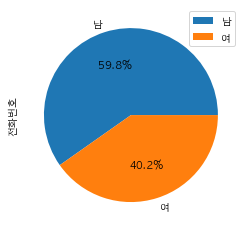

In [6]:
pivot_sex.plot.pie(y="전화번호", autopct='%1.1f%%')

### 위 차트 상으로 남자가 비중이 높다고 볼 수 있지만, 이 내용만으로 유의미한 결론이 나오지 않는다. 오히려, 성별과 나이대를 계산 hitmap을 그리도록 하자

In [7]:
## 히트맵 계산을 위해서, 나이대를 10 살 단위 기준으로 데이터를 정형화 하도록 한다.
## 이를 위해서 기존 데이터에 신규 칼럼 - "연령대" 을 추가하도록 하자.

age_band_width = 10
customer_24_drop_na['나이대'] = customer_24_drop_na['나이'].apply (lambda x: int(x/age_band_width) * age_band_width)
#customer_24_drop_na.head()

pivot_sex_age = pd.pivot_table(customer_24_drop_na, index="성별", columns = ["나이대"], values=['전화번호'], aggfunc='count')
display(pivot_sex_age)

/var/folders/zd/6h6t42ws54b0r4flr83gbx_40000gn/T/ipykernel_2518/4061808374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_24_drop_na['나이대'] = customer_24_drop_na['나이'].apply (lambda x: int(x/age_band_width) * age_band_width)


전화번호                                                             
나이대   0     10      20      30      40     50     60    70    80   90
성별                                                                   
남    5.0  42.0  1058.0  1668.0  1382.0  660.0  219.0  62.0   9.0  NaN
여    5.0  21.0   760.0  1243.0   857.0  330.0  153.0  51.0  17.0  1.0

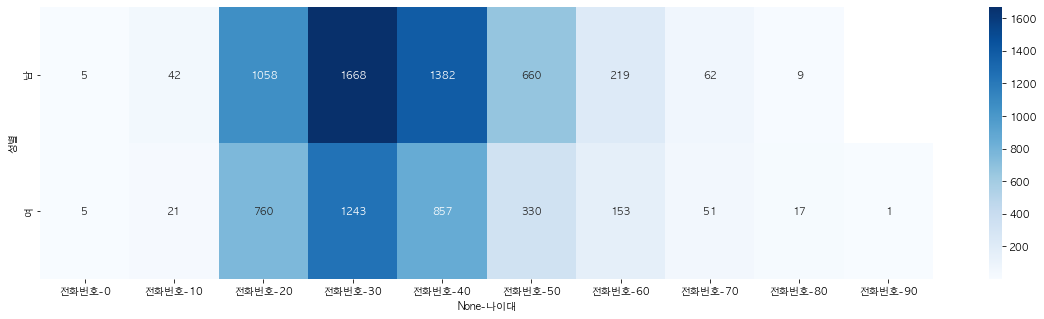

In [8]:
fig = plt.figure(figsize=(20,5))
fig.set_facecolor('white')
 
sns.heatmap(pivot_sex_age, cmap='Blues', annot=True, fmt=".0f")
plt.show()

## 28일 하루 기준으로 상담센터에 전화를 한 고객의 나이 및 성별에 대해서는 다음과 같이 정리 가능
* 상대적으로 여자 보다 남자가 좀 더 전화를 통해서 예판 참여 후 상담센터에 전화를 걸었다.
* 분포 자체는 남성/여성 모두에 있어서 30대가 가장 높은 비중으로 전화로 연결을 많이 했다.

위와 같은 상담센터 이용에 있어서 성별, 나이별 차이는 현재 대상 데이터가 예판 대상 장비와 연관이 있어서, 일반적이지는 않다라고 판단이 가능.

# 실제 위 분포의 특이성을 확인하기 위해선, **전체 갤럭시 폴더블 예판 참가자 분포와 차이가 있는지 분석이 필요**

# 예판 시점에 상담센터에 전화를 한 고객 특성을 분석하자. 우리는 상담센터에 전화를 건 사람들이 가지고 있는 특성이 궁금하다. 
* 예를 들어서 어떤 특정 요금제를 사용하는 사람들인지 아니면 어떤 개통 상 특이 사항이 있는 고객들인지?
* 특정 가입 채널 분포가 더 높은지 이것도 아니면, 가입 단말이 특이 하던지?
* 이러한 관점들에 대해서 실제 데이터를 기준으로 검증을 해나가고자 한다.

# 관련 데이터 준비 단계 - 원 주문 데이터와 접근자 핸폰 정보를 하나로 구성

## 고객별 주문 데이터를 준비 - orders

In [9]:
# 모바일 주문 정보 로딩 
mobile_order_1 = pd.DataFrame (pd.read_csv('./1_m.csv', dtype={'배송자휴대전화번호':str, 'T기프트배송자휴대전화번호':str}), columns=column_filter)
mobile_order_2 = pd.DataFrame (pd.read_csv('./2_m.csv', dtype={'배송자휴대전화번호':str, 'T기프트배송자휴대전화번호':str}), columns=column_filter)
mobile_orders = pd.concat([mobile_order_1, mobile_order_2], ignore_index=True, axis=0)
mobile_orders.reset_index(drop=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11,53,54,55,56,117,118,119,120,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,뉴보상기변 쓰던폰반납여부,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일
0,01033542025,NaN,210815569865/20210815235650624,2021-08-15 23:35:29,NaN,NaN,2021-08-19,NaN,SM-G988N_256GA,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
1,01053387519,01053387519,210815569832,2021-08-15 23:19:53,2021-08-16 14:42:55,2021-08-15 23:19:53,NaN,NaN,IPHONE_12_PRO_128GB,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
2,01091826959,01091826959,210815569822,2021-08-15 23:14:09,NaN,2021-08-15 23:14:09,2021-08-18,2021-08-18 10:14:00,IPHONE_12_128GB,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-17
3,01040536924,01040536924,210815569799,2021-08-15 23:05:21,2021-08-16 14:53:46,2021-08-15 23:05:21,NaN,NaN,IPHONE_12_MINI_256GGR,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
4,01044551511,01044551511,210815569790,2021-08-15 23:03:29,2021-08-15 23:18:16,2021-08-15 23:03:29,NaN,NaN,SM-G998N_256GS,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69714,01085198734,01085198734,210816569996,2021-08-16 00:38:16,2021-08-16 14:13:07,2021-08-16 00:38:16,NaN,NaN,IPHONE_12_128GW,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
69715,01050659647,01050659647,210816569991,2021-08-16 00:30:55,NaN,2021-08-16 00:30:55,2021-08-19,2021-08-18 14:46:00,IPHONE_12_PRO_128GG,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-17
69716,01044514776,01051764776,210816569933,2021-08-16 00:06:57,NaN,2021-08-16 00:06:57,2021-08-19,2021-08-18 17:24:00,OMD XIAOMI REDMI NOTE 10 PRO,기기변경,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-17
69717,01041103858,01041103858,210816569931,2021-08-16 00:05:39,2021-08-16 00:06:35,2021-08-16 00:05:39,NaN,NaN,SM-G998N_256G,기기변경,...,N,신청,신청,미신청,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 바로픽업 정보들 로딩
pickup_order_1 = pd.DataFrame (pd.read_csv('./1_b.csv', dtype={'배송자휴대전화번호':str, 'T기프트배송자휴대전화번호':str}), columns=column_filter)
pickup_order_2 = pd.DataFrame (pd.read_csv('./2_b.csv', dtype={'배송자휴대전화번호':str, 'T기프트배송자휴대전화번호':str}), columns=column_filter)
pickup_orders = pd.concat([pickup_order_1, pickup_order_2], ignore_index=True, axis=0)
pickup_orders.reset_index(drop=True)

,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,뉴보상기변 쓰던폰반납여부,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일
0,NaN,01071245017,210815569889,2021-08-15 23:50:18,NaN,2021-08-15 23:50:18,NaN,NaN,SM-G991N,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,PS&M,PS&M (수유점),NaN,NaN
1,NaN,01093663558,210815569871,2021-08-15 23:43:42,NaN,2021-08-15 23:43:42,NaN,NaN,IPHONE7_128GB,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,이안,이안대리점 신림역점,NaN,NaN
2,NaN,01063651314,210815569845,2021-08-15 23:31:14,NaN,2021-08-15 23:31:14,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,PS&M,PS&M (천안신불당점),NaN,NaN
3,NaN,01045948511,210815569834,2021-08-15 23:24:07,NaN,2021-08-15 23:24:07,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,ACT대리점,ACT대리점 광운대점,NaN,NaN
4,NaN,01044422873,210815569793,2021-08-15 23:17:38,NaN,2021-08-15 23:17:38,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,ACT대리점,ACT대리점 방학본점,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,NaN,01054055432,210816569990,2021-08-16 00:39:13,NaN,2021-08-16 00:39:13,NaN,NaN,IPHONE_11_PRO_256GB,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,홍릉대리점,홍릉대리점 동대문점,NaN,NaN
9631,NaN,01092877745,210816570002,2021-08-16 00:36:56,NaN,2021-08-16 00:36:56,NaN,NaN,SM-G998N_256G,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,PS&M,PS&M (영통점),NaN,NaN
9632,NaN,01035960413,210816569979,2021-08-16 00:28:52,NaN,2021-08-16 00:28:52,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,아이티대리점,아이티대리점 수원탑동점,NaN,NaN
9633,NaN,01094509312,210816569954,2021-08-16 00:22:38,NaN,2021-08-16 00:22:38,NaN,NaN,SM-N981NB,기기변경,...,N,NaN,NaN,미신청,NaN,NaN,한솔대리점,한솔대리점 시청점,NaN,NaN


In [11]:
# build up a merged dataframe that includes all data (mobile and pickup)
# 하나로 값들을 통합하는 동시에, 전화번호 중 유효한 번호로 데이터를 조합 새로운 칼럼을 만들었다.


orders = pd.concat([mobile_orders, pickup_orders], ignore_index=True, axis=0)

def merge_phone_num (row) :
    if row['배송자휴대전화번호'] != 'NaN' and isinstance(row['배송자휴대전화번호'], str) == True:
        return str(row['배송자휴대전화번호'])
    else:
        # if np.isnan(row['배송자휴대전화번호']) :
        #     print (">>" + str(type(row['배송자휴대전화번호'])) + " -- "+str(row['배송자휴대전화번호'] + " ;;; "+str(row['T기프트배송자휴대전화번호'])))
        # print ("target: "+row['배송자휴대전화번호']+" ---> "+row['T기프트배송자휴대전화번호'])
        return str(row['T기프트배송자휴대전화번호'])


orders['PhoneNum'] = orders.apply(lambda row: merge_phone_num(row), axis=1)




,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,PhoneNum
0,01033542025,NaN,210815569865/20210815235650624,2021-08-15 23:35:29,NaN,NaN,2021-08-19,NaN,SM-G988N_256GA,기기변경,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01033542025
1,01053387519,01053387519,210815569832,2021-08-15 23:19:53,2021-08-16 14:42:55,2021-08-15 23:19:53,NaN,NaN,IPHONE_12_PRO_128GB,기기변경,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01053387519
2,01091826959,01091826959,210815569822,2021-08-15 23:14:09,NaN,2021-08-15 23:14:09,2021-08-18,2021-08-18 10:14:00,IPHONE_12_128GB,기기변경,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-17,01091826959
3,01040536924,01040536924,210815569799,2021-08-15 23:05:21,2021-08-16 14:53:46,2021-08-15 23:05:21,NaN,NaN,IPHONE_12_MINI_256GGR,기기변경,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01040536924
4,01044551511,01044551511,210815569790,2021-08-15 23:03:29,2021-08-15 23:18:16,2021-08-15 23:03:29,NaN,NaN,SM-G998N_256GS,기기변경,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01044551511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79349,NaN,01054055432,210816569990,2021-08-16 00:39:13,NaN,2021-08-16 00:39:13,NaN,NaN,IPHONE_11_PRO_256GB,기기변경,...,NaN,NaN,미신청,NaN,NaN,홍릉대리점,홍릉대리점 동대문점,NaN,NaN,01054055432
79350,NaN,01092877745,210816570002,2021-08-16 00:36:56,NaN,2021-08-16 00:36:56,NaN,NaN,SM-G998N_256G,기기변경,...,NaN,NaN,미신청,NaN,NaN,PS&M,PS&M (영통점),NaN,NaN,01092877745
79351,NaN,01035960413,210816569979,2021-08-16 00:28:52,NaN,2021-08-16 00:28:52,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,NaN,NaN,미신청,NaN,NaN,아이티대리점,아이티대리점 수원탑동점,NaN,NaN,01035960413
79352,NaN,01094509312,210816569954,2021-08-16 00:22:38,NaN,2021-08-16 00:22:38,NaN,NaN,SM-N981NB,기기변경,...,NaN,NaN,미신청,NaN,NaN,한솔대리점,한솔대리점 시청점,NaN,NaN,01094509312


In [91]:
### 전화를 건 고객들 비중을 확인하기 위해서 등록

orders['결제일_2'] = orders.apply(lambda row: str(row["결제일"])[:10], axis = 1)
# display(orders.dtypes)
req_2_raw = orders[['결제일_2', 'PhoneNum']]

# 결제일이 없는 행은 지운 데이터
req_2_cleaned = req_2_raw.loc[req_2_raw['결제일_2'] != 'nan']
req_2_cleaned = req_2_cleaned.loc[req_2_cleaned['PhoneNum'] != 'nan']

# 정렬하고, 전화번호별로 최근 결제 항목만 남긴다.
req_2_refined = req_2_cleaned.sort_values(by = ['PhoneNum', '결제일_2'], ascending=False).groupby("PhoneNum").head(1)
display(req_2_refined)
# 79354개 주문 정보 중에서 1인 별 최종 결제일이 가까운 것만 남기고 지우니 53045개 생존



,결제일_2,PhoneNum
62557,2021-08-17,71797313
70075,2021-08-14,71383456
71210,2021-08-11,70774167970
15407,2021-08-01,30726571
36692,2021-08-22,21036051809
...,...,...
28281,2021-08-24,00109907929
65090,2021-08-17,00108618708
19510,2021-08-30,00103892859
30597,2021-08-23,00103826492


## 고객 센터 인입 고객 데이터 준비 - accesslog

In [12]:
# raw data를  읽어들임임
accesslog = pd.DataFrame (pd.read_csv('./access_raw.csv'))
index_names = accesslog[ accesslog['PhoneNum'] == '*' ].index

accesslog.drop(index_names, inplace=True)
display (accesslog)

,PhoneNum,인입일자,인입시간,상담사연결
0,01053174677,2021-08-24,00:09,X
1,01051441183,2021-08-24,00:11,X
2,01051441183,2021-08-24,00:12,X
3,01076541372,2021-08-24,00:17,X
4,01028039253,2021-08-24,00:21,X
...,...,...,...,...
109590,01091514026,2021-08-31,15:51,O
109591,01091726221,2021-08-31,16:41,O
109592,01050072852,2021-08-31,16:57,O
109593,01023215404,2021-08-31,17:16,X


In [13]:
# pivot으로 ID(전화번호) 별 전화 회수 테이블 구성
pivot_call_history = pd.pivot_table(accesslog, index="PhoneNum", values=['인입일자'], aggfunc='count')
pivot_call_history.columns.to_list()

reshaped_call_history = pivot_call_history.copy()
reshaped_call_history.columns = reshaped_call_history.columns.values
reshaped_call_history.reset_index (level=0, inplace=True)




,PhoneNum,인입일자
0,00117342729800,1
1,00119174746208,5
2,00166819294158,2
3,001821062119600,2
4,00207043070670,8
...,...,...
27760,7088575339,3
27761,7088743701,1
27762,7088924665,3
27763,8613735007430,1


In [168]:
##############################################################################################
##############################################################################################
##############################################################################################


display(set(orders["오늘보상 신청여부"]))

{nan,
 '개통대기',
 '개통보류',
 '개통완료',
 '개통요청',
 '개통요청_운영자',
 '개통취소',
 '교환물품발송',
 '구매완료',
 '물품배송중',
 '반품',
 '배송준비',
 '신청접수',
 '신청취소',
 '유심기변요청',
 '유키반려',
 '해피콜대기중'}

In [162]:
# display(set(orders["클럽기변 신청서 상태"]))

club_orders = orders.loc[(orders["클럽기변 신청서 상태"] == '신청') | (orders["클럽기변 신청서 상태"] == '취소')]
display(club_orders)

print(str(len(set(club_orders.PhoneNum))))

no_club_orders = orders.loc[(orders["클럽기변 신청서 상태"] != '신청') & (orders["클럽기변 신청서 상태"] != '취소')]
display(no_club_orders)

print(str(len(set(no_club_orders.PhoneNum))))

# display(orders.loc[orders["클럽기변 신청서 상태"] == '취소'])

,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,PhoneNum,결제일_2
9634,01045454157,01045454157,210806522362,2021-08-06 13:23:48,NaN,2021-08-06 13:23:48,NaN,NaN,SM-F707NG,기기변경,...,NaN,신청,5GX클럽_노트10_12R,497750.0,NaN,NaN,NaN,NaN,01045454157,2021-08-06
10200,01045454157,01045454157,210806519504,2021-08-06 00:32:33,NaN,2021-08-06 00:32:33,2021-08-06,2021-08-09 10:05:00,SM-G781N,기기변경,...,NaN,신청,5GX클럽_노트10_12R,497750.0,NaN,NaN,NaN,2021-08-06,01045454157,2021-08-06
10201,01045454157,01045454157,210806519499,2021-08-06 00:30:43,2021-08-06 00:59:56,2021-08-06 00:30:43,NaN,NaN,SM-G781N,기기변경,...,NaN,신청,5GX클럽_노트10_12R,497750.0,NaN,NaN,NaN,2021-08-06,01045454157,2021-08-06
10203,01045454157,01045454157,210806519479,2021-08-06 00:07:35,2021-08-06 00:28:09,2021-08-06 00:07:35,NaN,NaN,SM-F707N,기기변경,...,NaN,신청,5GX클럽_노트10_12R,497750.0,NaN,NaN,NaN,NaN,01045454157,2021-08-06
10204,01045454157,01045454157,210806519475,2021-08-06 00:05:06,2021-08-06 01:00:26,2021-08-06 00:05:06,NaN,NaN,SM-F707NG,기기변경,...,NaN,신청,5GX클럽_노트10_12R,497750.0,NaN,NaN,NaN,NaN,01045454157,2021-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68767,01085817920,01085817920,210817575696,2021-08-17 09:13:47,2021-08-17 11:55:51,2021-08-17 09:13:47,NaN,NaN,SM-F926N512GG,기기변경,...,NaN,취소,T갤클럽S10_5G_24R,632480.0,NaN,NaN,NaN,NaN,01085817920,2021-08-17
68896,01089988226,NaN,210817574601,2021-08-17 09:11:25,NaN,2021-08-17 09:11:25,2021-08-31,2021-08-27 12:49:00,SM-F926N_PXG,기기변경,...,NaN,취소,5GX클럽_노트10_24R,0.0,NaN,NaN,NaN,2021-08-26,01089988226,2021-08-17
69271,01091894244,01091894244,210817574463,2021-08-17 09:04:39,NaN,2021-08-17 09:04:39,2021-08-27,2021-08-28 10:54:00,SM-F926N_PXG,기기변경,...,NaN,신청,T갤클럽S10_5G_24R,672670.0,NaN,NaN,NaN,2021-08-26,01091894244,2021-08-17
69285,01091036660,01091036660,210817574436,2021-08-17 09:04:16,2021-08-17 09:09:06,2021-08-17 09:04:16,NaN,NaN,SM-F926N512GG,기기변경,...,NaN,취소,T갤클럽S10_5G_24R,632480.0,NaN,NaN,NaN,NaN,01091036660,2021-08-17


1204


,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,PhoneNum,결제일_2
0,01033542025,NaN,210815569865/20210815235650624,2021-08-15 23:35:29,NaN,NaN,2021-08-19,NaN,SM-G988N_256GA,기기변경,...,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01033542025,nan
1,01053387519,01053387519,210815569832,2021-08-15 23:19:53,2021-08-16 14:42:55,2021-08-15 23:19:53,NaN,NaN,IPHONE_12_PRO_128GB,기기변경,...,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01053387519,2021-08-15
2,01091826959,01091826959,210815569822,2021-08-15 23:14:09,NaN,2021-08-15 23:14:09,2021-08-18,2021-08-18 10:14:00,IPHONE_12_128GB,기기변경,...,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-17,01091826959,2021-08-15
3,01040536924,01040536924,210815569799,2021-08-15 23:05:21,2021-08-16 14:53:46,2021-08-15 23:05:21,NaN,NaN,IPHONE_12_MINI_256GGR,기기변경,...,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01040536924,2021-08-15
4,01044551511,01044551511,210815569790,2021-08-15 23:03:29,2021-08-15 23:18:16,2021-08-15 23:03:29,NaN,NaN,SM-G998N_256GS,기기변경,...,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN,01044551511,2021-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79349,NaN,01054055432,210816569990,2021-08-16 00:39:13,NaN,2021-08-16 00:39:13,NaN,NaN,IPHONE_11_PRO_256GB,기기변경,...,NaN,미신청,NaN,NaN,홍릉대리점,홍릉대리점 동대문점,NaN,NaN,01054055432,2021-08-16
79350,NaN,01092877745,210816570002,2021-08-16 00:36:56,NaN,2021-08-16 00:36:56,NaN,NaN,SM-G998N_256G,기기변경,...,NaN,미신청,NaN,NaN,PS&M,PS&M (영통점),NaN,NaN,01092877745,2021-08-16
79351,NaN,01035960413,210816569979,2021-08-16 00:28:52,NaN,2021-08-16 00:28:52,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,NaN,미신청,NaN,NaN,아이티대리점,아이티대리점 수원탑동점,NaN,NaN,01035960413,2021-08-16
79352,NaN,01094509312,210816569954,2021-08-16 00:22:38,NaN,2021-08-16 00:22:38,NaN,NaN,SM-N981NB,기기변경,...,NaN,미신청,NaN,NaN,한솔대리점,한솔대리점 시청점,NaN,NaN,01094509312,2021-08-16


61268


In [163]:
caller_with_club = pd.merge(club_orders, reshaped_call_history, how="left", on="PhoneNum")

connected_club = caller_with_club[pd.isna(caller_with_club.인입일자) == False]

display(connected_club)

print (str(len(set(connected_club.PhoneNum))))




,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,PhoneNum,결제일_2,인입일자,상담사연결,연결율
10,01071681992,01071681992,210831773208,2021-08-31 23:36:37,2021-09-03 16:39:52,2021-08-31 23:36:37,NaN,NaN,SM-F711NC,기기변경,...,696590.0,NaN,NaN,NaN,NaN,01071681992,2021-08-31,1.0,1.0,1.000000
11,01039212132,01039212132,210831772665,2021-08-31 22:11:58,2021-09-02 12:31:17,2021-08-31 22:11:58,NaN,NaN,SM-F711NV,기기변경,...,698500.0,NaN,NaN,NaN,NaN,01039212132,2021-08-31,1.0,1.0,1.000000
12,01052933965,01052933965,210831770999,2021-08-31 18:02:32,NaN,2021-08-31 18:02:32,2021-08-31,NaN,SM-F711NG,기기변경,...,690850.0,NaN,NaN,NaN,NaN,01052933965,2021-08-31,9.0,8.0,0.888889
13,01053887816,01053887816,210831770698,2021-08-31 17:38:31,NaN,2021-08-31 17:38:31,2021-08-31,NaN,SM-F711NC,기기변경,...,634910.0,NaN,NaN,NaN,NaN,01053887816,2021-08-31,6.0,5.0,0.833333
14,01030126520,01030126520,210831769508,2021-08-31 15:56:52,NaN,2021-08-31 15:56:52,2021-09-04,2021-09-04 12:49:00,SM-F711NV,기기변경,...,685110.0,NaN,NaN,NaN,2021-09-03,01030126520,2021-08-31,3.0,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,01048133736,01048133736,210817576706,2021-08-17 09:19:38,NaN,2021-08-17 09:19:38,2021-08-24,2021-08-20 09:42:00,SM-F711NV,기기변경,...,660230.0,NaN,NaN,NaN,2021-08-19,01048133736,2021-08-17,3.0,2.0,0.666667
1374,01054611041,01054611041,210817575452,2021-08-17 09:16:51,NaN,2021-08-17 09:16:51,2021-08-24,2021-08-24 12:44:00,SM-F711NV,기기변경,...,655450.0,NaN,NaN,NaN,2021-08-19,01054611041,2021-08-17,4.0,3.0,0.750000
1375,01040092382,01040092382,210817576166,2021-08-17 09:15:15,2021-08-17 09:19:13,2021-08-17 09:15:15,NaN,NaN,SM-F926N512G,기기변경,...,669800.0,NaN,NaN,NaN,NaN,01040092382,2021-08-17,1.0,1.0,1.000000
1377,01089988226,NaN,210817574601,2021-08-17 09:11:25,NaN,2021-08-17 09:11:25,2021-08-31,2021-08-27 12:49:00,SM-F926N_PXG,기기변경,...,0.0,NaN,NaN,NaN,2021-08-26,01089988226,2021-08-17,12.0,12.0,1.000000


808


In [164]:
caller_without_club = pd.merge(no_club_orders, reshaped_call_history, how="left", on="PhoneNum")

connected_no_club = caller_without_club[pd.isna(caller_without_club.인입일자) == False]

display(connected_no_club)

print (str(len(set(connected_no_club.PhoneNum))))

,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,개통일,배송일,모델명,가입유형,...,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,PhoneNum,결제일_2,인입일자,상담사연결,연결율
45,01052213806,01052213806,210815569400,2021-08-15 20:18:10,NaN,2021-08-15 20:18:09,2021-08-24,2021-08-24 11:05:00,IPHONE_SE_2020_128GW_UP,기기변경,...,NaN,NaN,NaN,NaN,2021-08-23,01052213806,2021-08-15,1.0,1.0,1.000
54,01054127828,01024407994,210815569211,2021-08-15 18:38:13,2021-08-17 10:16:21,2021-08-15 18:38:13,NaN,NaN,SM-G998N_256GS,기기변경,...,NaN,NaN,NaN,NaN,NaN,01054127828,2021-08-15,2.0,2.0,1.000
113,01093145122,01093145122,210815568631,2021-08-15 14:26:11,NaN,2021-08-15 14:26:11,2021-08-18,2021-08-18 10:24:00,SM-A826SV,기기변경,...,NaN,NaN,NaN,NaN,2021-08-17,01093145122,2021-08-15,1.0,1.0,1.000
125,01052729902,01052729902,210815568479,2021-08-15 13:37:12,2021-08-16 17:15:47,2021-08-15 13:37:12,NaN,NaN,SM-G998N_256GS,기기변경,...,NaN,NaN,NaN,NaN,NaN,01052729902,2021-08-15,8.0,7.0,0.875
162,01031944662,01031944662,210815568011,2021-08-15 10:39:46,NaN,2021-08-15 10:39:46,2021-08-30,2021-08-31 14:15:00,SM-T225N,신규가입,...,0.0,NaN,NaN,NaN,2021-08-30,01031944662,2021-08-15,2.0,1.0,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77909,NaN,01032102576,210816571124,2021-08-16 11:55:07,NaN,2021-08-16 11:55:07,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,NaN,PS&M,PS&M (여수중앙점),NaN,NaN,01032102576,2021-08-16,1.0,1.0,1.000
77924,NaN,01087773335,210816570971,2021-08-16 11:25:51,NaN,2021-08-16 11:25:50,NaN,NaN,SM-A325N,기기변경,...,NaN,지은대리점,지은대리점 원곡동점,NaN,NaN,01087773335,2021-08-16,1.0,1.0,1.000
77929,NaN,01050363716,210816570929,2021-08-16 11:14:26,NaN,2021-08-16 11:14:26,NaN,NaN,IPHONE_11_PRO_256GM,기기변경,...,NaN,광장대리점,광장대리점 하남점,NaN,NaN,01050363716,2021-08-16,6.0,6.0,1.000
77948,NaN,01086889009,210816570699,2021-08-16 10:11:08,NaN,2021-08-16 10:11:08,NaN,NaN,SM-G986N_256GW,기기변경,...,NaN,KB대리점,KB대리점 본점,NaN,NaN,01086889009,2021-08-16,2.0,2.0,1.000


16527


In [165]:
828/1204

0.6877076411960132

In [166]:
16527/61268

0.2697492981654371

In [119]:
# reshaped_call_history - 상담센터에 전화한 고객 전화 번호 및 전화 회수
# req_2_refined - 결제를 했던 고객의 결제 날짜와 전화 번호

# print ("상담센터 전화를 한 고객들 전화번호 별 전화 회수")
# display(reshaped_call_history)

# print ("")
# print ("8월 결제 고객들 중 최종 주문 기준 전화번호와 결제일 테이블")
# display(req_2_refined)



merged_call_and_order_date = pd.merge(reshaped_call_history,req_2_refined, how="left", on="PhoneNum")
caller_without_order = merged_call_and_order_date.loc[pd.isna(merged_call_and_order_date['결제일_2'])]

print ('주문 번호가 없는 상담센터 전화한 고객들 데이터')
display(caller_without_order)

print ('평균 연결율: '+ str(caller_without_order['연결율'].mean()))
sum_caller_without_order = caller_without_order['상담사연결'].sum()
print ('전화 회수: '+str(sum_caller_without_order))
print ('1인당 평균 전화 회수: '+str(sum_caller_without_order/11248))

print ('')
print ('주문 내역이 있는 고객들 전화 번호')
caller_with_order = merged_call_and_order_date.dropna()
display(caller_with_order)
print ('평균 연결율: '+ str(caller_with_order['연결율'].mean()))
sum_caller_with_order = caller_with_order['상담사연결'].sum()
print ('전화 회수: '+str(sum_caller_with_order))
print ('1인당 평균 전화 회수: '+str(sum_caller_with_order/16517))


주문 번호가 없는 상담센터 전화한 고객들 데이터


,PhoneNum,인입일자,상담사연결,연결율,결제일_2
0,00117342729800,1,1.0,1.000000,NaN
1,00119174746208,5,5.0,1.000000,NaN
2,00166819294158,2,1.0,0.500000,NaN
3,001821062119600,2,0.0,0.000000,NaN
4,00207043070670,8,8.0,1.000000,NaN
...,...,...,...,...,...
27760,7088575339,3,1.0,0.333333,NaN
27761,7088743701,1,1.0,1.000000,NaN
27762,7088924665,3,3.0,1.000000,NaN
27763,8613735007430,1,0.0,0.000000,NaN


평균 연결율: 0.6025313283729626
전화 회수: 21155.0
1인당 평균 전화 회수: 1.8807788051209104

주문 내역이 있는 고객들 전화 번호


,PhoneNum,인입일자,상담사연결,연결율,결제일_2
15,01020000571,27,26.0,0.962963,2021-08-18
17,01020003772,2,1.0,0.500000,2021-08-27
18,01020007318,14,12.0,0.857143,2021-08-17
19,01020008180,1,1.0,1.000000,2021-08-20
20,01020008320,5,5.0,1.000000,2021-08-30
...,...,...,...,...,...
27426,01099997945,4,3.0,0.750000,2021-08-30
27427,01099998752,4,1.0,0.250000,2021-08-31
27428,01099999309,1,1.0,1.000000,2021-08-17
27430,01099999592,2,2.0,1.000000,2021-08-17


평균 연결율: 0.800003655132668
전화 회수: 62224.0
1인당 평균 전화 회수: 3.767270085366592


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='상담사연결', ylabel='Density'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from c

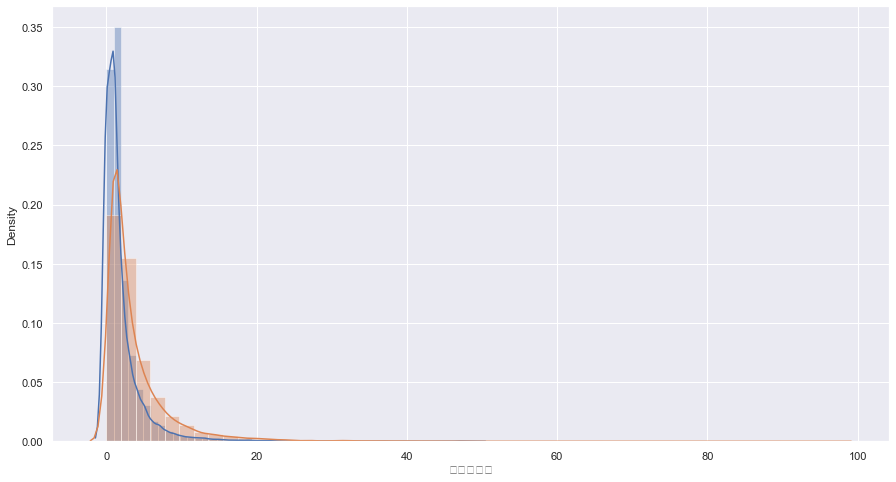

In [138]:

# caller_without_order["상담사연결"].plot.hist()
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(caller_without_order['상담사연결'], kde=True)
sns.distplot(caller_with_order['상담사연결'], kde=True)




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='연결율', ylabel='Density'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from cur

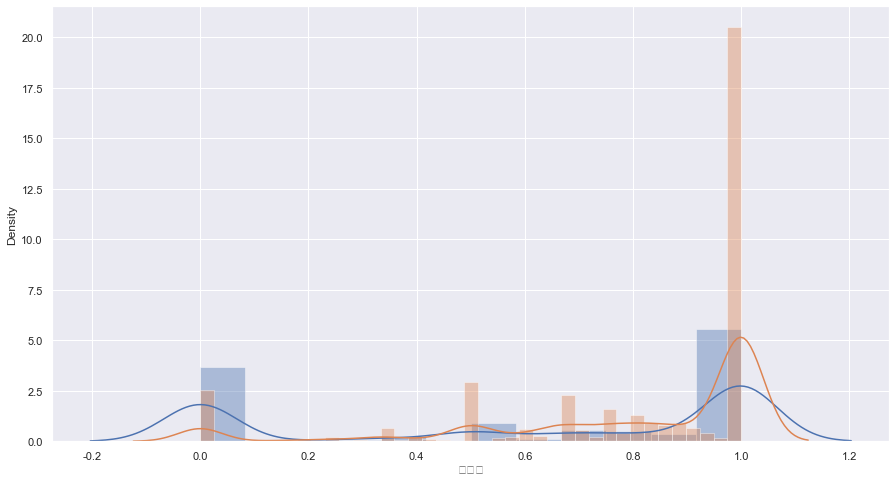

In [141]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(caller_without_order['연결율'], kde=True)
sns.distplot(caller_with_order['연결율'], kde=True)

In [142]:
print (str(16517/53045))

0.3113771326232444


In [14]:
accesslog_connected = accesslog[accesslog['상담사연결'] == 'O']
#display(accesslog_connected)

pivot_connected_count = pd.pivot_table(accesslog_connected, values="상담사연결", index="PhoneNum", aggfunc="count")
display(pivot_connected_count)

,상담사연결
PhoneNum,
00117342729800,1
00119174746208,5
00166819294158,1
00207043070670,8
00207075787272,4
...,...
7088106155,1
7088246821,1
7088575339,1


In [15]:
# 상담사연결 회수까지 반영해서 기존 reshaped_call_history를 보강한다.

reshaped_call_history = pd.merge (reshaped_call_history, pivot_connected_count, how="left", on="PhoneNum")
reshaped_call_history = reshaped_call_history.fillna(0)

def cal_connect_rate(row) :
    return row['상담사연결']/row['인입일자']
reshaped_call_history['연결율'] = reshaped_call_history.apply(lambda row: cal_connect_rate(row), axis = 1)
display(reshaped_call_history)




,PhoneNum,인입일자,상담사연결,연결율
0,00117342729800,1,1.0,1.000000
1,00119174746208,5,5.0,1.000000
2,00166819294158,2,1.0,0.500000
3,001821062119600,2,0.0,0.000000
4,00207043070670,8,8.0,1.000000
...,...,...,...,...
27760,7088575339,3,1.0,0.333333
27761,7088743701,1,1.0,1.000000
27762,7088924665,3,3.0,1.000000
27763,8613735007430,1,0.0,0.000000


## 개인별 연결율에 따른 만족도 
### 1.0 은 1번 전화해서 1번 연결
### 0.5 는 2번 전화해서 1번 연결

<AxesSubplot:>

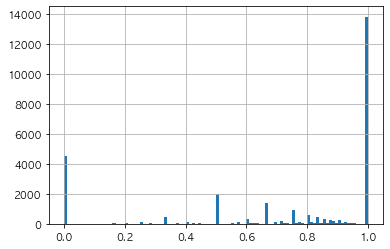

In [16]:
reshaped_call_history['연결율'].hist(bins=100)

## todo ; 비율로 계산. -> 1인당 평균 만족도.


# 요청 1 : 누적  만족도  정리
- 전체 고객들의 만족도 분포를 그래프화 하도록 한다. 
- 특정 만족도 이하 고객 비율도 계산을 하도록 한다.

In [57]:
req_1_table = reshaped_call_history.copy()
req_1_table['만족도_구간'] = req_1_table.apply(lambda row: int(row['연결율'] * 100 / 5 ) * 5, axis =1)

display(req_1_table)

,PhoneNum,인입일자,상담사연결,연결율,만족도_구간
0,00117342729800,1,1.0,1.000000,100
1,00119174746208,5,5.0,1.000000,100
2,00166819294158,2,1.0,0.500000,50
3,001821062119600,2,0.0,0.000000,0
4,00207043070670,8,8.0,1.000000,100
...,...,...,...,...,...
27760,7088575339,3,1.0,0.333333,30
27761,7088743701,1,1.0,1.000000,100
27762,7088924665,3,3.0,1.000000,100
27763,8613735007430,1,0.0,0.000000,0


,PhoneNum,누적인원비중
만족도_구간,,
100,13815,49
95,13884,50
90,14436,51
85,15292,55
80,16569,59
75,17704,63
70,18063,65
65,19500,70
60,19979,71


<AxesSubplot:xlabel='만족도_구간'>

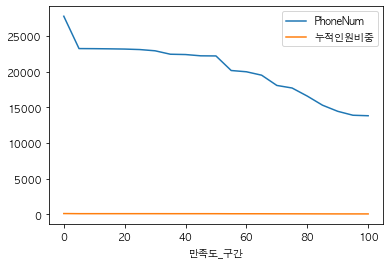

In [63]:
pivot_req_1_table = pd.pivot_table(req_1_table, values="PhoneNum", index="만족도_구간",aggfunc="count")

reverse_pivot_req_1_table = pivot_req_1_table.iloc[::-1]

accumulated_req_1 = reverse_pivot_req_1_table.cumsum()
accumulated_req_1['누적인원비중'] = accumulated_req_1.apply(lambda row: int(row['PhoneNum']/27765*100), axis=1)
display(accumulated_req_1)



,누적인원비중
만족도_구간,
100,49
95,50
90,51
85,55
80,59
75,63
70,65
65,70
60,71


<AxesSubplot:xlabel='만족도_구간'>

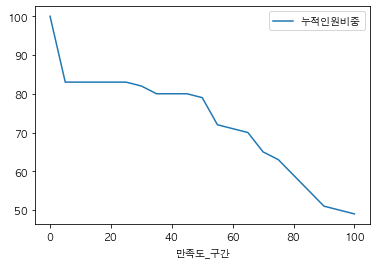

In [66]:
req_1_refined_table = accumulated_req_1.drop('PhoneNum', axis=1)
display(req_1_refined_table)

req_1_refined_table.plot()


## 상담사 연결이 된 회수에 따른 고객 분포
### 상담사 연결이 3이라면, 고객이 상담사와 최종 연결을 3번이 이루어진 고객을 지칭

<AxesSubplot:xlabel='상담사연결'>

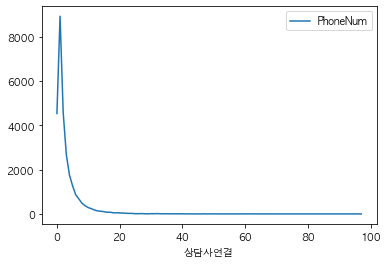

In [18]:
#상담사 연결 회수에 따른 분포
reshaped_call_history_2 = reshaped_call_history.copy()
dist_connected_pivot = pd.pivot_table(reshaped_call_history_2, index='상담사연결', values='PhoneNum', aggfunc='count')
#display(dist_connected_pivot)
dist_connected_pivot.plot()

## 시도를 했지만, 연결이 안 된 고객들 전화 시도 분포

In [19]:
not_connected_users = reshaped_call_history[reshaped_call_history['상담사연결'] == 0]

pivot_not_connect_dist = pd.pivot_table(not_connected_users, index="상담사연결", columns="인입일자", values="PhoneNum", aggfunc="count")
display (pivot_not_connect_dist)

인입일자,1,2,3,4,5,6,7,8,9,11,13,19,20,22,29
상담사연결,,,,,,,,,,,,,,,
0.0,3638,578,177,67,33,10,11,7,4,3,2,1,1,1,1


In [20]:
# 전화건 고객과 주문 내역을 묶어서 caller_and_order DataFrame을 구성하자.
caller_and_order = pd.merge(reshaped_call_history, orders, how="left", on="PhoneNum")
display(caller_and_order)


,PhoneNum,인입일자,상담사연결,연결율,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,...,뉴보상기변 쓰던폰반납여부,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일
0,00117342729800,1,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00119174746208,5,5.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00166819294158,2,1.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001821062119600,2,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00207043070670,8,8.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33208,7088575339,3,1.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33209,7088743701,1,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33210,7088924665,3,3.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33211,8613735007430,1,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 병합한 데이터 청소를 해야 한다. 주문번호가 없는 친구들 비중이 어떻게 되지?

cleaned_caller_and_order = caller_and_order[caller_and_order['주문번호'].notna()]
cleaned_caller_and_order.reindex()


,PhoneNum,인입일자,상담사연결,연결율,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,...,뉴보상기변 쓰던폰반납여부,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일
15,01020000571,27,26.0,0.962963,01020000571,01020000571,210818615393,2021-08-18 09:52:09,NaN,2021-08-18 09:52:09,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2021-08-24
16,01020000571,27,26.0,0.962963,01020000571,01020000571,210817598909,2021-08-17 15:48:40,2021-08-17 16:28:46,2021-08-17 15:48:40,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
17,01020000571,27,26.0,0.962963,NaN,01020000571,210817601762,2021-08-17 16:50:46,NaN,2021-08-17 16:50:46,...,N,NaN,NaN,NaN,NaN,NaN,메트로대리점,메트로대리점 본점,NaN,NaN
18,01020000571,27,26.0,0.962963,NaN,01020000571,210817601277,2021-08-17 16:40:54,NaN,2021-08-17 16:40:54,...,N,NaN,NaN,NaN,NaN,NaN,챌린저,챌린저대리점 본점,NaN,NaN
20,01020003772,2,1.0,0.500000,01020003772,01020003772,210827739230,2021-08-27 18:19:38,NaN,2021-08-27 18:19:38,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2021-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32874,01099998752,4,1.0,0.250000,01099998752,01099998752,210831766078,2021-08-31 11:37:11,2021-08-31 13:11:36,2021-08-31 11:37:11,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
32875,01099999309,1,1.0,1.000000,01099999309,01099999309,210817582473,2021-08-17 10:22:27,NaN,2021-08-17 10:22:27,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-09-03
32877,01099999592,2,2.0,1.000000,01099999592,01099999592,210817585466,2021-08-17 11:06:34,NaN,2021-08-17 11:06:34,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
32878,01099999592,2,2.0,1.000000,01099999592,01099999592,210817576103,2021-08-17 09:29:49,2021-08-17 11:08:32,2021-08-17 09:29:49,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [22]:
print ("전체 인입된 전화 번호 개수: "+ str(len(caller_and_order)))
print ("실제 주문 번호와 매칭된 전화 개수:"+str(len(cleaned_caller_and_order)))
ratio_of_no_order_id = len(cleaned_caller_and_order) / len(caller_and_order)
print (">> 주문 번호가 없는 전화 비중: "+ str((1 - ratio_of_no_order_id)*100))

전체 인입된 전화 번호 개수: 33213
실제 주문 번호와 매칭된 전화 개수:22595
>> 주문 번호가 없는 전화 비중: 31.96940956854244


In [23]:
주문번호별_전화번호_개수 = pd.pivot_table (cleaned_caller_and_order, index="PhoneNum", values=['주문번호'], aggfunc='count', margins=True)
#display(주문번호별_전화번호_개수)

pivot_order_count_per_phoneNum = 주문번호별_전화번호_개수.copy()
pivot_order_count_per_phoneNum.columns = 주문번호별_전화번호_개수.columns.values
pivot_order_count_per_phoneNum.reset_index (level=0, inplace=True)
display(pivot_order_count_per_phoneNum)


pivot_hist_df = pd.pivot_table (pivot_order_count_per_phoneNum, index="주문번호", values=['PhoneNum'], aggfunc='count', margins=True)
display(pivot_hist_df)


,PhoneNum,주문번호
0,01020000571,4
1,01020003772,4
2,01020007318,1
3,01020008180,2
4,01020008320,1
...,...,...
17143,01099998752,2
17144,01099999309,1
17145,01099999592,2
17146,0221483843,1


,PhoneNum
주문번호,
1,13234
2,2963
3,666
4,174
5,57
6,20
7,10
8,6
9,7


In [24]:
# cleaned_caller_and_order.to_csv("../cleaned.csv", encoding = 'utf-8' )

## 전체 인입된 ARS 번호에 대해서 주문번호와 직접 매칭되지 않은 주문 번호들 값이 전체 인입 전화 중 약 32%를 차지한다.

### !!!! 아직 남은 의문.. 약 32%에 해당하는 주문과 연결되지 않은 전화 번호들은 어떤 것들일까??? 이 부분에 대해서 확인이 필요하다.

In [25]:
display(cleaned_caller_and_order)



,PhoneNum,인입일자,상담사연결,연결율,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,...,뉴보상기변 쓰던폰반납여부,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일
15,01020000571,27,26.0,0.962963,01020000571,01020000571,210818615393,2021-08-18 09:52:09,NaN,2021-08-18 09:52:09,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2021-08-24
16,01020000571,27,26.0,0.962963,01020000571,01020000571,210817598909,2021-08-17 15:48:40,2021-08-17 16:28:46,2021-08-17 15:48:40,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
17,01020000571,27,26.0,0.962963,NaN,01020000571,210817601762,2021-08-17 16:50:46,NaN,2021-08-17 16:50:46,...,N,NaN,NaN,NaN,NaN,NaN,메트로대리점,메트로대리점 본점,NaN,NaN
18,01020000571,27,26.0,0.962963,NaN,01020000571,210817601277,2021-08-17 16:40:54,NaN,2021-08-17 16:40:54,...,N,NaN,NaN,NaN,NaN,NaN,챌린저,챌린저대리점 본점,NaN,NaN
20,01020003772,2,1.0,0.500000,01020003772,01020003772,210827739230,2021-08-27 18:19:38,NaN,2021-08-27 18:19:38,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2021-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32874,01099998752,4,1.0,0.250000,01099998752,01099998752,210831766078,2021-08-31 11:37:11,2021-08-31 13:11:36,2021-08-31 11:37:11,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,NaN
32875,01099999309,1,1.0,1.000000,01099999309,01099999309,210817582473,2021-08-17 10:22:27,NaN,2021-08-17 10:22:27,...,N,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-09-03
32877,01099999592,2,2.0,1.000000,01099999592,01099999592,210817585466,2021-08-17 11:06:34,NaN,2021-08-17 11:06:34,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
32878,01099999592,2,2.0,1.000000,01099999592,01099999592,210817576103,2021-08-17 09:29:49,2021-08-17 11:08:32,2021-08-17 09:29:49,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


{nan, '미신청', '신청', '취소'}

,PhoneNum,인입일자,상담사연결,연결율,배송자휴대전화번호,T기프트배송자휴대전화번호,주문번호,주문일,취소일,결제일,...,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,예판모델
34,01020011671,3,2.0,0.666667,01020011671,01020011671,210818627000,2021-08-18 17:43:51,NaN,2021-08-18 17:43:51,...,미신청,NaN,신청,5GX클럽_노트10_24R,0.0,NaN,NaN,NaN,NaN,Y
80,01020063824,4,3.0,0.750000,01020063824,01020063824,210820651508,2021-08-20 13:23:00,NaN,2021-08-20 13:23:00,...,미신청,NaN,신청,5GX클럽_노트10_24R,698500.0,NaN,NaN,NaN,NaN,Y
196,01020189993,2,2.0,1.000000,01020189993,01020189993,210822673242,2021-08-22 10:58:33,NaN,2021-08-22 10:58:33,...,미신청,NaN,신청,5GX클럽_노트10_24R,698500.0,NaN,NaN,NaN,2021-08-23,Y
233,01020223076,1,1.0,1.000000,01020223076,01020223076,210819642291,2021-08-19 18:27:29,NaN,2021-08-19 18:27:29,...,미신청,NaN,신청,5GX클럽_노트10_24R,698500.0,NaN,NaN,NaN,2021-08-21,Y
247,01020228877,5,5.0,1.000000,01020228877,01020228877,210825715886,2021-08-25 15:22:30,NaN,2021-08-25 15:22:30,...,미신청,NaN,신청,T갤클럽S10_5G_24R,671710.0,NaN,NaN,NaN,2021-08-31,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32722,01099682267,3,1.0,0.333333,01099682267,01099682267,210817580316,2021-08-17 10:00:49,NaN,2021-08-17 10:00:49,...,미신청,NaN,신청,T갤클럽S10_5G_24R,626740.0,NaN,NaN,NaN,2021-08-20,Y
32727,01099692453,25,23.0,0.920000,01099692453,01099692453,210817600650,2021-08-17 16:34:07,NaN,2021-08-17 16:34:07,...,미신청,NaN,신청,T갤클럽S10_5G_24R,696390.0,NaN,NaN,NaN,2021-08-19,Y
32748,01099760106,3,2.0,0.666667,01099760106,01099760106,210823692359,2021-08-23 16:47:50,NaN,2021-08-23 16:47:50,...,미신청,NaN,신청,5GX클럽_노트10_24R,692760.0,NaN,NaN,NaN,2021-08-29,Y
32767,01099805259,9,9.0,1.000000,01099805259,01099805259,210819640568,2021-08-19 17:10:37,NaN,2021-08-19 17:10:37,...,미신청,NaN,신청,5GX클럽_노트10_24R,698500.0,NaN,NaN,NaN,2021-08-21,Y


In [26]:
## 분석 전 기존 데이터에 대한 추가 가공

# 예판 모델을 구매한 주문인지 여부를 신규 칼럽으로 추가
def add_yn_column_for_folderble(row):
    modelcode = str(row['모델명'])
    if modelcode.startswith('SM-F711') or modelcode.startswith('SM-F926'):
        return "Y"
    else:
        return "N"

cleaned_caller_and_order['예판모델'] = cleaned_caller_and_order.apply(lambda row: add_yn_column_for_folderble(row), axis=1)
len (cleaned_caller_and_order)

/var/folders/zd/6h6t42ws54b0r4flr83gbx_40000gn/T/ipykernel_2518/1140330518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_caller_and_order['예판모델'] = cleaned_caller_and_order.apply(lambda row: add_yn_column_for_folderble(row), axis=1)


22595

In [27]:
cleaned_caller_and_order.to_csv("cleaned_orders.csv")

In [28]:
# 예판 모델에 의해서 전화를 건 고객들 전화 회수와 고객 수, 일반 모델을 통한 데이터를 비교
presale_call_num_df = pd.pivot_table(cleaned_caller_and_order, index="예판모델", values="인입일자", aggfunc="sum")
presale_caller_num_df = pd.pivot_table(cleaned_caller_and_order, index="예판모델", values="PhoneNum", aggfunc=(lambda x: len(x.unique())))

presale_1 = presale_call_num_df.copy()
presale_1.columns = presale_call_num_df.columns.values
presale_1.reset_index(level=0, inplace=True)

presale_2 = presale_caller_num_df.copy()
presale_2.columns = presale_caller_num_df.columns.values
presale_2.reset_index(level=0, inplace=True)

display(presale_1)
display(presale_2)

presale_merged = pd.merge(presale_1, presale_2, how="left", on="예판모델")
display(presale_merged)

presale_merged["call count per caller"] = presale_merged.apply(lambda row: row["인입일자"]/row["PhoneNum"], axis=1)
display(presale_merged)

,예판모델,인입일자
0,N,40328
1,Y,68836


,예판모델,PhoneNum
0,N,6165
1,Y,11699


,예판모델,인입일자,PhoneNum
0,N,40328,6165
1,Y,68836,11699


,예판모델,인입일자,PhoneNum,call count per caller
0,N,40328,6165,6.541444
1,Y,68836,11699,5.883922


# 분석  수행을 하도록 한다.
---- 
## 분석 1. 24일 기준 인입된 고객들 성별/연령 특이 사항이 있는가?
----

### 본 항목에 대해서는 앞선 데이터 분석 결과 참고
### 현재 성별이나 연령에 있어서 특이 사항이 보이지는 않는다.

----
## 분석 2. 예판 기간 고객센터 전화 건 고객들 가입유형 특성은 어떻게 되는가?
----


In [29]:
join_pattern_pivot = pd.pivot_table (cleaned_caller_and_order, index=["가입유형"], values=['PhoneNum'], aggfunc=(lambda x: len(x.unique())), margins=True)
display(join_pattern_pivot)

join_pattern_pivot_1 = pd.pivot_table (cleaned_caller_and_order, index=["가입유형","예판모델"], values=['PhoneNum'], aggfunc=(lambda x: len(x.unique())), margins=True)
display(join_pattern_pivot_1)


,PhoneNum
가입유형,
기기변경,14572
번호이동,434
신규가입,2856
All,17147


PhoneNum
가입유형 예판모델          
기기변경 N         3413
     Y        11362
번호이동 N          116
     Y          321
신규가입 N         2807
     Y           51
All           17147

## 위 데이터를 보게 되면, 절대다수가 기기변경을 진행하는 고객이며, 이 중에서도 예판 참석을 했던 고객들인 것은 자명해 보인다.
## 그런데, 고객 회수 기준으로 반복 전화를 건 고객 특성 확인하기 위해서, 이들에 대한 전화 회수 데이터도 추가한다.

In [30]:
join_pattern_pivot_2 = pd.pivot_table (cleaned_caller_and_order, index=["가입유형"], values=['인입일자'], aggfunc='sum')
join_pattern_pivot_2_1 = pd.pivot_table (cleaned_caller_and_order, index=["가입유형"], values=['PhoneNum'], aggfunc=(lambda x: len(x.unique())))

#display(join_pattern_pivot_2)

join_pattern_merge = pd.merge(join_pattern_pivot_2_1, join_pattern_pivot_2, how="left", on="가입유형")
join_pattern_ratio = join_pattern_merge.copy()
join_pattern_ratio.columns = join_pattern_merge.columns.values
join_pattern_ratio.reset_index (level=0, inplace=True)

def cal_ratio(row):
    return row['인입일자'] / row['PhoneNum']

join_pattern_ratio["1인당 콜 회수 평균"] = join_pattern_ratio.apply(lambda row: cal_ratio(row), axis=1)
display(join_pattern_ratio)

,가입유형,PhoneNum,인입일자,1인당 콜 회수 평균
0,기기변경,14572,88614,6.081114
1,번호이동,434,2733,6.297235
2,신규가입,2856,17817,6.238445


## 상대적으로 1인당 콜 회수 평균은 번호이동 이나 신규가입 같이 기존 SKT가 아닌 타사 고객인 경우가 많은 것으로 보인다.
### 그런데, 평균 1인당 콜 회수가 6번이 넘어간다니.. 이 자체가 비정상적 아닌가? 물론 연결율이 안 좋았기는 해서 그렇다고 보인다만.
### 그렇다면 연결된 회수 기준으로 고객 연결 회수 분포를 및 평균을 확인해보면 어떨까?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


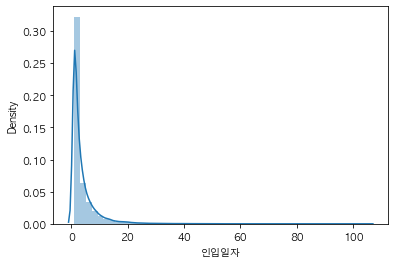

In [31]:
sns.distplot(reshaped_call_history['인입일자'])
plt.show()

----
## 분석 3. 예판 기간 고객센터 전화 건 고객들 가입채널은 어떻게 되는가?
----

In [32]:
# 가입 채널별로 인입되었던 고객들 위치를 확인한다.
print ("전체 주문 수 : " + str(cleaned_caller_and_order['주문번호'].unique().size))

channel_order_sum = pd.pivot_table (cleaned_caller_and_order, index="주문구분", values=['주문번호'], aggfunc='count', margins=True)
#display(channel_order_sum)

channel_customer_sum = pd.pivot_table (cleaned_caller_and_order, index="주문구분", values=['PhoneNum'], aggfunc=(lambda x: len(x.unique())), margins=True)
#display(channel_customer_sum)


channel_status = pd.merge(channel_customer_sum, channel_order_sum, how='left', on='주문구분')
channel_status['고객당_주문_개수_비'] = channel_status.apply(lambda row: row['주문번호']/row['PhoneNum'], axis=1)
display(channel_status)

## !!!! todo: 주문 고객 대비, 상담 인입 고객 비중


전체 주문 수 : 22595


,PhoneNum,주문번호,고객당_주문_개수_비
주문구분,,,
11번가 휴대폰샵,782,1078,1.378517
T다이렉트샵,9006,11788,1.308905
고객care센터,8177,9675,1.183197
시나리오 채팅,53,54,1.018868
All,17147,22595,1.317723


----
## 분석 4. 예판 기간 고객센터 전화 건 고객들 주된 가입 단말은 어떻게 되는가? 
----

In [33]:
#print(cleaned_caller_and_order.columns.to_list)

In [34]:
# phone_model_df = cleaned_caller_and_order.copy()

def add_yn_column_for_folderble(row):
    modelcode = str(row['모델명'])
    if modelcode.startswith('SM-F711') or modelcode.startswith('SM-F926'):
        return "Y"
    else:
        return "N"

cleaned_caller_and_order['예판모델'] = cleaned_caller_and_order.apply(lambda row: add_yn_column_for_folderble(row), axis=1)

phone_model_pivot_level_1 = pd.pivot_table (cleaned_caller_and_order, index=["예판모델"], values=['주문번호'], aggfunc='count', margins=True)
display(phone_model_pivot_level_1)

phone_model_pivot_level_3 = pd.pivot_table (cleaned_caller_and_order, index=["예판모델"], values=['PhoneNum'], aggfunc=(lambda x: len(x.unique())), margins=True)

display(phone_model_pivot_level_3)

phone_model_pivot_level_2 = pd.pivot_table (cleaned_caller_and_order, index=["예판모델",'모델명'], values=['주문번호'], aggfunc='count', margins=True)
display(phone_model_pivot_level_2)

print("전체 콜센터 전화건 고객 중 예판 모델 외 건으로 전화한 고객 수 (6165명/17147명): "+ str(6165/17247*100) +"%")


/var/folders/zd/6h6t42ws54b0r4flr83gbx_40000gn/T/ipykernel_2518/908545903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_caller_and_order['예판모델'] = cleaned_caller_and_order.apply(lambda row: add_yn_column_for_folderble(row), axis=1)


,주문번호
예판모델,
N,8029
Y,14566
All,22595


,PhoneNum
예판모델,
N,6165
Y,11699
All,17147


주문번호
예판모델 모델명                         
N    AT-M110S                  36
     AW6 40 BLU AL NAVY SP     16
     AW6 40 RED AL RED SP       1
     AW6 40 SIL SS WT SP        3
     AW6 44 SIL SS WT SP        1
...                           ...
Y    SM-F926N512GS            663
     SM-F926NG                442
     SM-F926NS                398
     SM-F926N_PXG             611
All                         22595

[267 rows x 1 columns]

전체 콜센터 전화건 고객 중 예판 모델 외 건으로 전화한 고객 수 (6165명/17147명): 35.7453470168725%


## 위 데이터에 따르면, 예판 모델에 의한 전화 통화 수가 전체 전화 발송 고객 주문번호 기준 36% 고객이 예판 때문에 전화를 한 것이 아니었다.
### !!! 예판 고객과 아닌 고객들의 전화 통화 인입 건수 비중 확인 필요

----
## 분석 5. 예판 기간 고객센터 전화 건 고객들 중 클럽기변 비중은?
----

In [35]:
club_package_pivot = pd.pivot_table (cleaned_caller_and_order, index=["클럽기변 신청서 상태", '예판모델'], values=['PhoneNum'], aggfunc=(lambda x: len(x.unique())), margins=True)
display(club_package_pivot)

print ("클럽기변 고객 수 비중: "+str(717/14572))

## todo: 클럽기변 신청자와 일반 고객들의 전화 회수 차이를 확인

PhoneNum
클럽기변 신청서 상태 예판모델          
미신청         N         3413
            Y        10712
신청          Y          717
취소          Y          187
All                  14572

클럽기변 고객 수 비중: 0.049203952786165246


## 위 데이터에 따르면, 콜센터 전화 고객 중 클럽기변 신청자 비중은 약 5% 차지하며, 이 고객에 대한 대응이 전체 연결율을 향상 시키지는 않을 것 같다.
### !!! 반복 전화 고객 중에서 클럽 기변 비중에 대해서 확인이 필요하다.

----
## 분석 6. 예판 기간 고객센터 전화 건 고객들 라이트할부 신청여부 비중은?
----
### 라이트할부에 대해서는 대상 고객을 찾아내는 데이터를 발견하지 못 했습니다. 
### 아애 대해서는 추가적인 데이터 확인을 통해서 확인 가능합니다.

----
## 분석 7. 10회 이상 상담한 고객에 대한 Swing 대화 내역 검토 (관련해서는 상담센터 확인 필요)
----
### 여기서는 우선 10회 아상 상담한 고객에 대한 연락처 정보를 확인하도록 한다.
### 대상 정보는 swing_check_calls.csv로 추출 저장을 합니다.


In [36]:
over_10_caller_df = cleaned_caller_and_order[cleaned_caller_and_order['인입일자'] >= 10]
# display(over_10_caller_df)

low_connect_ratio_and_high_call_freq = over_10_caller_df[over_10_caller_df['연결율'] < 0.3]
# displa/y(low_connect_ratio_and_high_call_freq)

filter_cols = ['PhoneNum', '인입일자', '상담사연결', '연결율', '주문번호']
extracted_target_caller = low_connect_ratio_and_high_call_freq[['PhoneNum', '인입일자', '상담사연결', '연결율', '주문번호']]

display(extracted_target_caller)
extracted_target_caller.to_csv('./swing_check_calls.csv')

,PhoneNum,인입일자,상담사연결,연결율,주문번호
687,01020809511,18,4.0,0.222222,210823687416
815,01021040330,19,2.0,0.105263,210822677576
1501,01023086136,11,3.0,0.272727,210819632703
1576,01023277241,13,1.0,0.076923,210826725910
1577,01023277241,13,1.0,0.076923,210823684753
...,...,...,...,...,...
30784,01093786873,23,2.0,0.086957,210826725559
30785,01093786873,23,2.0,0.086957,210826720874
31172,01094262051,13,3.0,0.230769,210821663413
31173,01094262051,13,3.0,0.230769,210817581174


----
## 분석 8. 10회 이상 전화를 한 고객들에 대해서 나이 성별 데이터 확인을 해보자.
### 모수가 작아져서 우선 연결율 제약은 0.5를 두었다가 제거를 해서 우선 접근하자.
----


In [37]:
# 연결율이 0.5 이하이며, 10회 이상 전화를 건 고객이 가지는 특성을 알아보자.

target_callers_with_high_freq_and_low_connect = over_10_caller_df[over_10_caller_df['연결율'] < 0.5]
# display(target_callers_with_high_freq_and_low_connect)
# display(customer_24_drop_na)

joined_caller_info_for_24 = pd.merge(left=customer_24_drop_na, right=over_10_caller_df, how="inner", left_on="전화번호", right_on="PhoneNum")
display(joined_caller_info_for_24)

,전화번호,나이,성별,나이대,PhoneNum,인입일자,상담사연결,연결율,배송자휴대전화번호,T기프트배송자휴대전화번호,...,오늘보상 신청여부,오늘보상 수거상태,클럽기변 신청서 상태,T 갤럭시 클럽,클럽기변 단말기할부금 면제금액,대리점명,매장명,D코드,발송일,예판모델
0,01076541372,28.0,여,20,01076541372,10,7.0,0.700000,01076541372,01076541372,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,N
1,01076541372,28.0,여,20,01076541372,10,7.0,0.700000,NaN,01076541372,...,NaN,NaN,NaN,NaN,NaN,한빛대리점,한빛대리점 본점,NaN,NaN,N
2,01076541372,28.0,여,20,01076541372,10,7.0,0.700000,NaN,01076541372,...,NaN,NaN,NaN,NaN,NaN,다울대리점,다울대리점 본점,NaN,NaN,N
3,01076541372,28.0,여,20,01076541372,10,7.0,0.700000,NaN,01076541372,...,NaN,NaN,미신청,NaN,NaN,PS&M,PS&M (롯데광복점),NaN,NaN,Y
4,01032961111,55.0,남,50,01032961111,13,10.0,0.769231,01032961111,01032961111,...,신청,신청,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-21,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,01040265419,30.0,남,30,01040265419,22,5.0,0.227273,01040265419,01040265419,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,N
1159,01088674483,47.0,여,40,01088674483,10,7.0,0.700000,01088674483,01088674483,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-23,Y
1160,01079132657,36.0,남,30,01079132657,37,32.0,0.864865,01079132657,01079132657,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2021-08-25,N
1161,01044868820,35.0,여,30,01044868820,19,6.0,0.315789,01044868820,01044868820,...,미신청,NaN,미신청,NaN,NaN,NaN,NaN,NaN,2021-08-31,Y


<AxesSubplot:xlabel='성별', ylabel='나이'>

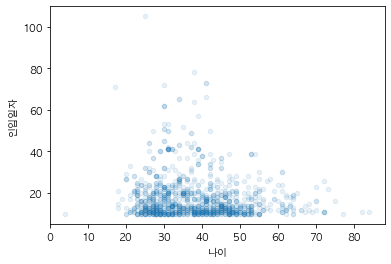

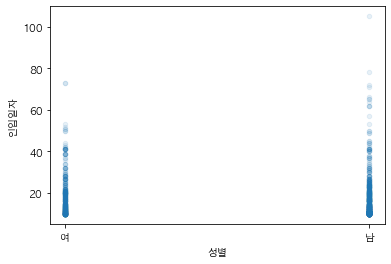

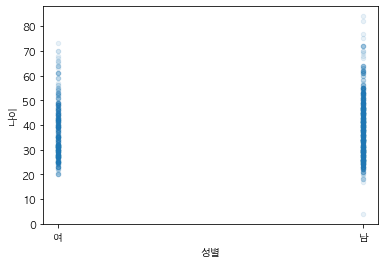

In [38]:
## 10회 이상 전화를 건 고객 성별 정보 특이 사항이나, 나이에 있어서 분포를 그려보자.

joined_caller_info_for_24[['인입일자', '나이']].plot.scatter(x="나이", y="인입일자", alpha=0.1)
joined_caller_info_for_24[['인입일자', '성별']].plot.scatter(x="성별", y="인입일자", alpha=0.1)
joined_caller_info_for_24[['나이', '성별']].plot.scatter(x="성별", y="나이", alpha=0.1)

### 위 결과만을 봐서는 어떤 특정지어지는 성별/나이와 반복 전화 특성이 보이지 않는다.
### 연결율이 낮은 대상군 0.5 이하 대상군을 기준으로 했을 때, 차이를 시각적으로 살펴 보자

<AxesSubplot:xlabel='성별', ylabel='나이'>

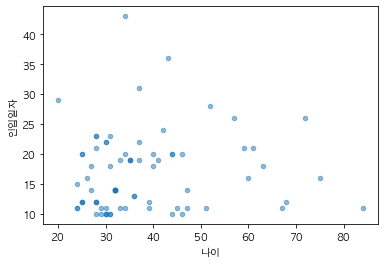

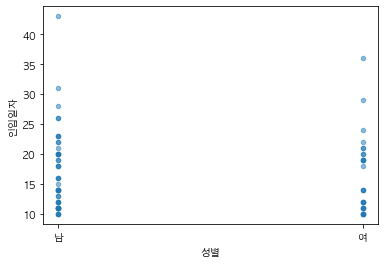

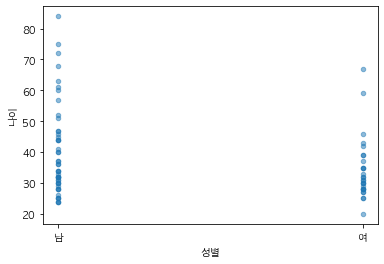

In [39]:
joined_caller_info_with_low_connect_ratio = pd.merge(left=customer_24_drop_na, right=target_callers_with_high_freq_and_low_connect, how="inner", left_on="전화번호", right_on="PhoneNum")

joined_caller_info_with_low_connect_ratio[['인입일자', '나이']].plot.scatter(x="나이", y="인입일자", alpha=0.5)
joined_caller_info_with_low_connect_ratio[['인입일자', '성별']].plot.scatter(x="성별", y="인입일자", alpha=0.5)
joined_caller_info_with_low_connect_ratio[['나이', '성별']].plot.scatter(x="성별", y="나이", alpha=0.5)

## 다른 관점에서 바라봐야 할 부분에 대한 의견이 필요합니다.
## 유의미한 것은 !! 남성 여성 특정 성별이나 나이대에 집중이 되어 있는 것은 아닌지에 대한 편견은 의미가 없다는 판단이 됩니다.

----
## 분석 9. 자동/셀프 개통 진행여부
----

In [40]:
# 대상 고객을 5회 이상 전화를 한 고객으로 한정해서 데이터를 분석하자.
# 이를 위해서 기존 정리된 데이터에서 5회 이상 연락자 정보를 추출한다.

over_5_caller_df = cleaned_caller_and_order[cleaned_caller_and_order['인입일자'] >= 5]
display(over_5_caller_df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['PhoneNum', '인입일자', '상담사연결', '연결율', '배송자휴대전화번호', 'T기프트배송자휴대전화번호',
       '주문번호', '주문일', '취소일', '결제일', '개통일', '배송일', '모델명', '가입유형', '약정프로그램',
       '요금제', '무약정Plan선택여부', '결제방법', '배송방법', '대리점', '주문유형', '쿠폰여부',
       '지인(추천인)코드', '개통일자', '센터명', '모바일구매여부', '상품구분(맞춤/패키지)', '서비스관리번호',
       'TG상태값', '주문구분', '상담사소속', '대리점코드(중분류)', '외부유입경로', '약정구분', '포인트결제',
       '동의방법', '뉴보상기변 쓰던폰반납여부', '오늘보상 신청여부', '오늘보상 수거상태', '클럽기변 신청서 상태',
       'T 갤럭시 클럽', '클럽기변 단말기할부금 면제금액', '대리점명', '매장명', 'D코드', '발송일', '예판모델'],
      dtype='object')>

In [41]:
# 5회 이상 전화건 고객에 대한 동의 방법에 따른 분포
pd.pivot_table(over_5_caller_df, index='동의방법', values='PhoneNum', columns='주문구분', aggfunc='count', margins=True)


주문구분,T다이렉트샵,고객care센터,시나리오 채팅,All
동의방법,,,,
MMS동의,NaN,2061.0,NaN,2061
녹취동의,NaN,1365.0,NaN,1365
동의선택진행안함,NaN,41.0,NaN,41
셀프동의,217.0,NaN,21.0,238
All,217.0,3467.0,21.0,3705


In [42]:
pd.pivot_table(over_10_caller_df, index='동의방법', values='PhoneNum', columns='주문구분', aggfunc='count', margins=True)
## 일반 고객이 셀프 개통자들보다 더 전화 많이 하는지?## 셀프개통자도 전화를 많이 하는지? (일반 기간도 확인 필요)

주문구분,T다이렉트샵,고객care센터,시나리오 채팅,All
동의방법,,,,
MMS동의,NaN,784.0,NaN,784
녹취동의,NaN,514.0,NaN,514
동의선택진행안함,NaN,16.0,NaN,16
셀프동의,75.0,NaN,4.0,79
All,75.0,1314.0,4.0,1393


## 5회 이상, 10회 이상 전화를 한 고객들 대상을 보면, MMS동의 및 녹취동의를 한 고객이 높은 비중으로 상담센터에 다수 전화를 하고 있다.
## 그런 측면으로 보아야 할지 모르겠지만, 인입 채널이 온라인이 아닌 고객센터 통한 개통이 훨씬 많은 비중으로 전화를 다수 진행

## 가입 채널을 통한 배포를 다시 전화를 한 고객 대상으로 분석해보자.

In [43]:
pd.pivot_table(over_5_caller_df, index='주문구분', values='PhoneNum', aggfunc='count', margins=True)


,PhoneNum
주문구분,
11번가 휴대폰샵,247
T다이렉트샵,3758
고객care센터,3467
시나리오 채팅,21
All,7493


In [44]:
pd.pivot_table(over_10_caller_df, index='주문구분', values='PhoneNum', aggfunc='count', margins=True)


,PhoneNum
주문구분,
11번가 휴대폰샵,88
T다이렉트샵,1409
고객care센터,1314
시나리오 채팅,4
All,2815


## 위 데이터 점검을 하니, '동의방법'이 기록되지 않은 고객이 혼란을 주어, 오히려 잘못된 결론으로 유도가 되었다.
## 상담센터에 전화를 자주 건 고객은 특별이 센터나, TDS 웹이냐 따라서 영향을 받지는 않았다.

----
## 분석 10. 배송유형 
----

In [45]:
pd.pivot_table(over_5_caller_df, index='배송방법', values='인입일자', aggfunc='mean', margins=True)


,인입일자
배송방법,
바로도착,10.308725
바로도착 행복배송,9.769841
택배(무료),10.483670
All,10.456516


In [46]:
pd.pivot_table(over_5_caller_df, index='배송방법', values='PhoneNum', aggfunc='count', margins=True)


,PhoneNum
배송방법,
바로도착,596
바로도착 행복배송,126
택배(무료),6430
All,7152


## 배송 방법에 따른 전화 회수 또는 전화를 자주하는 특정 배송 방법은 발견되지 않았습니다.

----
## 분석 11. 바로보상 신청여부
----

In [47]:
pd.pivot_table(over_5_caller_df, index='오늘보상 신청여부', values='PhoneNum', aggfunc='count', margins=True)

##todo: 이들의 평균 콜 수. 콜을 야기하는 부분들이 어떤 것인가??


,PhoneNum
오늘보상 신청여부,
미신청,4321
신청,1516
All,5837


In [48]:
pd.pivot_table(over_10_caller_df, index='오늘보상 신청여부', values='PhoneNum', aggfunc='count', margins=True)


,PhoneNum
오늘보상 신청여부,
미신청,1604
신청,561
All,2165


## 위 데이터를 기준으로 보았을 때, 오늘보상 신청한 고객 경우에 관련해서 전화를 자주했음을 확인할 수 있습니다.
## 추가로 오늘보상 신청한 고객들에 대해서 전화 회수도 유의미하게 높은지 알아봅니다.

In [49]:
pd.pivot_table(over_10_caller_df, index='오늘보상 신청여부', values='인입일자', aggfunc='mean', margins=True)


,인입일자
오늘보상 신청여부,
미신청,16.923940
신청,16.957219
All,16.932564


## 오늘보상을 신청했다고 해서, 평균 수치가 높은 것은 아니라는 생각도 들지만,
## 이는 바른 해석일까 다시 한 번 고민해볼 필요가 있다.

----
## 분석 12. 주문- 배송- 개통 일자 leadtime 분석
----

In [50]:
over_5_caller_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['PhoneNum', '인입일자', '상담사연결', '연결율', '배송자휴대전화번호', 'T기프트배송자휴대전화번호',
       '주문번호', '주문일', '취소일', '결제일', '개통일', '배송일', '모델명', '가입유형', '약정프로그램',
       '요금제', '무약정Plan선택여부', '결제방법', '배송방법', '대리점', '주문유형', '쿠폰여부',
       '지인(추천인)코드', '개통일자', '센터명', '모바일구매여부', '상품구분(맞춤/패키지)', '서비스관리번호',
       'TG상태값', '주문구분', '상담사소속', '대리점코드(중분류)', '외부유입경로', '약정구분', '포인트결제',
       '동의방법', '뉴보상기변 쓰던폰반납여부', '오늘보상 신청여부', '오늘보상 수거상태', '클럽기변 신청서 상태',
       'T 갤럭시 클럽', '클럽기변 단말기할부금 면제금액', '대리점명', '매장명', 'D코드', '발송일', '예판모델'],
      dtype='object')>

In [51]:
leadtime_df = over_10_caller_df[['PhoneNum', '결제일', '발송일', '배송일', '개통일', '연결율', '인입일자']].dropna()
display(leadtime_df)

,PhoneNum,결제일,발송일,배송일,개통일,연결율,인입일자
15,01020000571,2021-08-18 09:52:09,2021-08-24,2021-08-25 09:50:00,2021-08-26,0.962963,27
66,01020041661,2021-08-23 16:48:07,2021-08-29,2021-08-31 16:23:00,2021-08-31,0.950000,20
75,01020052923,2021-08-23 09:31:40,2021-08-24,2021-08-25 13:39:00,2021-08-26,0.818182,11
103,01020081242,2021-08-22 17:45:10,2021-08-26,2021-08-27 10:21:00,2021-08-27,0.928571,14
104,01020081403,2021-08-17 10:45:49,2021-08-18,2021-08-20 10:17:00,2021-08-24,0.866667,15
...,...,...,...,...,...,...,...
32780,01099836598,2021-08-25 22:59:05,2021-08-29,2021-08-31 13:58:00,2021-08-31,0.800000,15
32821,01099898989,2021-08-19 13:27:57,2021-08-20,2021-08-25 15:23:00,2021-08-25,0.642857,14
32847,01099951507,2021-08-23 13:12:32,2021-08-26,2021-08-27 10:03:00,2021-08-27,0.900000,10
32852,01099961077,2021-08-17 17:28:43,2021-08-19,2021-08-25 09:11:00,2021-08-24,0.900000,10


In [52]:


from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

def cal_leadtime_1(row):
    delievered_time = datetime.strptime(row['배송일'], '%Y-%m-%d %H:%M:%S')
    pay_time = datetime.strptime(row['결제일'], '%Y-%m-%d %H:%M:%S')

    return (delievered_time-pay_time).seconds

def cal_leadtime_2(row):
    open_time = datetime.strptime(row['개통일'], '%Y-%m-%d')
    pay_time = datetime.strptime(row['결제일'], '%Y-%m-%d %H:%M:%S')
    return (open_time - pay_time).seconds

def cal_leadtime_3(row):
    open_time = datetime.strptime(row['개통일'], '%Y-%m-%d')
    delievered_time = datetime.strptime(row['배송일'], '%Y-%m-%d %H:%M:%S')
    return (open_time - delievered_time).seconds

leadtime_df['결제_배송'] = leadtime_df.apply(lambda row: cal_leadtime_1(row), axis=1)
leadtime_df['결제_개통'] = leadtime_df.apply(lambda row: cal_leadtime_2(row), axis=1)
leadtime_df['배송_개통'] = leadtime_df.apply(lambda row: cal_leadtime_3(row), axis=1)

display(leadtime_df)

,PhoneNum,결제일,발송일,배송일,개통일,연결율,인입일자,결제_배송,결제_개통,배송_개통
15,01020000571,2021-08-18 09:52:09,2021-08-24,2021-08-25 09:50:00,2021-08-26,0.962963,27,86271,50871,51000
66,01020041661,2021-08-23 16:48:07,2021-08-29,2021-08-31 16:23:00,2021-08-31,0.950000,20,84893,25913,27420
75,01020052923,2021-08-23 09:31:40,2021-08-24,2021-08-25 13:39:00,2021-08-26,0.818182,11,14840,52100,37260
103,01020081242,2021-08-22 17:45:10,2021-08-26,2021-08-27 10:21:00,2021-08-27,0.928571,14,59750,22490,49140
104,01020081403,2021-08-17 10:45:49,2021-08-18,2021-08-20 10:17:00,2021-08-24,0.866667,15,84671,47651,49380
...,...,...,...,...,...,...,...,...,...,...
32780,01099836598,2021-08-25 22:59:05,2021-08-29,2021-08-31 13:58:00,2021-08-31,0.800000,15,53935,3655,36120
32821,01099898989,2021-08-19 13:27:57,2021-08-20,2021-08-25 15:23:00,2021-08-25,0.642857,14,6903,37923,31020
32847,01099951507,2021-08-23 13:12:32,2021-08-26,2021-08-27 10:03:00,2021-08-27,0.900000,10,75028,38848,50220
32852,01099961077,2021-08-17 17:28:43,2021-08-19,2021-08-25 09:11:00,2021-08-24,0.900000,10,56537,23477,53340


<AxesSubplot:xlabel='결제_배송', ylabel='인입일자'>

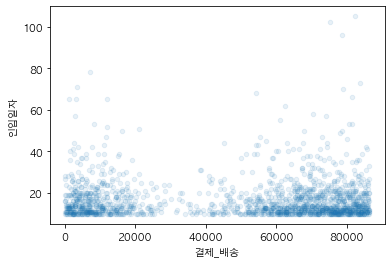

In [53]:
leadtime_df.plot.scatter(y="인입일자", x="결제_배송", alpha=0.1)


<AxesSubplot:xlabel='결제_개통', ylabel='인입일자'>

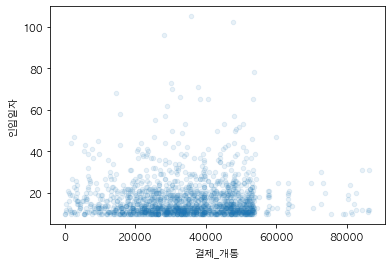

In [54]:
leadtime_df.plot.scatter(y="인입일자", x="결제_개통", alpha=0.1)

13.88888888888889

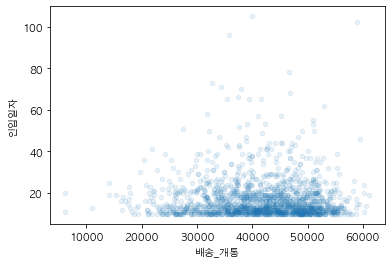

In [55]:
leadtime_df.plot.scatter(y="인입일자", x="배송_개통", alpha=0.1)
#  시간 축을 일 단위로 
50000/60/60

50000/60/60/24

## 위 데이터를 보았을 때에는 우선 배송된 뒤에 개통까지 시간이 많이 소요되는 경우와 실제 전화 연결 회수와 관게가 있어 보인다.

In [56]:
import scipy.stats as stats

display(stats.pearsonr(leadtime_df["인입일자"], leadtime_df["결제_배송"]))
display(stats.pearsonr(leadtime_df["인입일자"], leadtime_df["결제_개통"]))
display(stats.pearsonr(leadtime_df["인입일자"], leadtime_df["배송_개통"]))


(-0.017321655891574275, 0.4830413830249941)

(0.009377295736494949, 0.7041666374623374)

(-0.025312354446462678, 0.3053253407810682)

## 통계적인 분석으로 상관계수 및 p-value 값 기준으로는 통계적으로 유의미한 관계가 없습니다.